In [18]:
# Trinidad Marroquin
# qsq707

## Lab 6B

<em>This lab introduces you to machine learning and the Scikit-Learn library. You'll analyze a given data set using the techniques of machine learning following book chapter 15 closely. We'll work with the digits dataset which comes with the Scikit-learn library to categorize hand written digits to determine which number it is.

### Tasks

You will do the following
1. Install the scikit-learn library by entering ```pip install -U scikit-learn``` in the Anaconda Prompt (not the notebook)
2. The data of the digits data set is already loaded into the variable ```digits``` in the code below. Your task is to split this data into training and a testing data 
3. Use the k-nearest neighbour model to classify the data (meaning determine which number the hand written digit is)
4. Test your model comparing the predicted values with the actual values using the testing subset. 
    - Calculate the acuracy the model predicts the correct digit from the pixel graphic of the hand written digit.
    - Create a heatmap of the confusion matrix

Checking system resources before loading data:
CPU Usage: 7.9%
Memory Available: 16209.14 MB
Disk Space Available: 200425.18 MB

Data successfully loaded.

Checking system resources after data preparation:
CPU Usage: 1.2%
Memory Available: 16214.59 MB
Disk Space Available: 200425.16 MB

Attempting to split data into training and testing sets...
Data successfully split into training and testing sets.
Training set size: 1437
Testing set size: 360

Final system resource check:
CPU Usage: 0.6%
Memory Available: 16208.96 MB
Disk Space Available: 200425.16 MB

Execution complete.


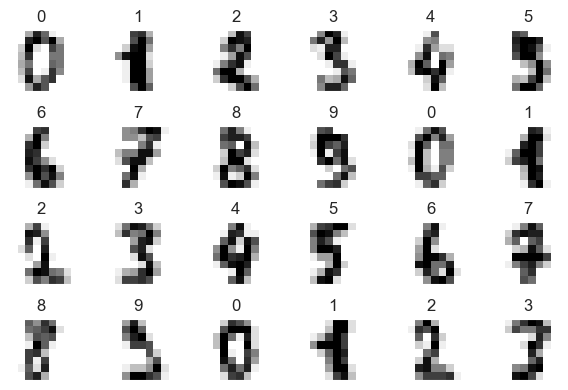

In [19]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import psutil

# Function to check system resources
def check_system_resources():
    cpu_usage = psutil.cpu_percent(interval=1)
    memory_info = psutil.virtual_memory()
    disk_info = psutil.disk_usage('/')

    print(f"CPU Usage: {cpu_usage}%")
    print(f"Memory Available: {memory_info.available / (1024 ** 2):.2f} MB")
    print(f"Disk Space Available: {disk_info.free / (1024 ** 2):.2f} MB")

# Load the dataset inside a try-except block to catch any errors
try:
    # Check system resources before data loading
    print("Checking system resources before loading data:")
    check_system_resources()

    digits = load_digits()

    print("\nData successfully loaded.")
    
    # Display some pictures in the data set of the digits
    figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

    for item in zip(axes.ravel(), digits.images, digits.target):
        axes, image, target = item
        axes.imshow(image, cmap=plt.cm.gray_r)
        axes.set_xticks([])
        axes.set_yticks([])
        axes.set_title(target)

    plt.tight_layout()
    
    # Reshaping the data to feed into the model
    X = digits.images.reshape((len(digits.images), -1))
    y = digits.target

    # Check system resources after data preparation
    print("\nChecking system resources after data preparation:")
    check_system_resources()

    # Split the data into training and testing sets
    try:
        print("\nAttempting to split data into training and testing sets...")
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    except ValueError as e:
        print(f"ValueError during data split: {e}")
    else:
        print("Data successfully split into training and testing sets.")
        print(f"Training set size: {X_train.shape[0]}")
        print(f"Testing set size: {X_test.shape[0]}")
    
    finally:
        # Check system resources after the data split
        print("\nFinal system resource check:")
        check_system_resources()

except Exception as e:
    print(f"An error occurred: {e}")
finally:
    print("\nExecution complete.")



Initializing k-NN model with 3 neighbors...

Training the k-NN model...
k-NN model successfully trained.

Making predictions on the test set...
Predictions successfully made.

Calculating accuracy of the model...
Model accuracy: 98.33%

Predicted vs Actual labels for first 10 test samples:
Predicted: 6, Actual: 6
Predicted: 9, Actual: 9
Predicted: 3, Actual: 3
Predicted: 7, Actual: 7
Predicted: 2, Actual: 2
Predicted: 1, Actual: 1
Predicted: 5, Actual: 5
Predicted: 2, Actual: 2
Predicted: 5, Actual: 5
Predicted: 2, Actual: 2

Creating a confusion matrix...
Confusion matrix created.

Visualizing the confusion matrix as a heatmap...


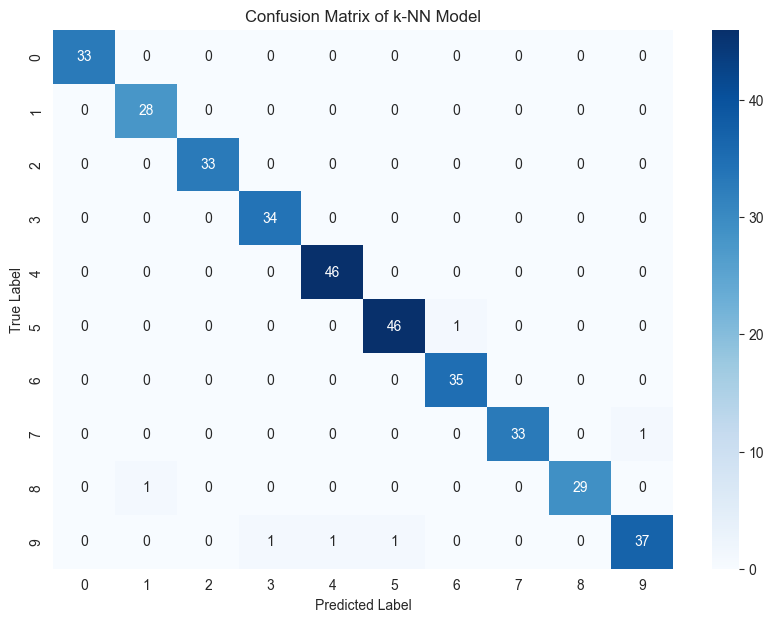


Classification process complete.


In [20]:
# Task 3 and 4

import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.pyplot as plt

def classify_digits_knn(X_train, y_train, X_test, y_test, n_neighbors=3):
    """
    Classify digits using k-NN algorithm with error handling and code checks.

    Args:
    - X_train: Training data (features).
    - y_train: Training data (labels).
    - X_test: Testing data (features).
    - y_test: Testing data (labels).
    - n_neighbors: Number of neighbors to consider in k-NN (default=3).

    Returns:
    - accuracy: The accuracy score of the model on the test set.
    """
    try:
        print(f"\nInitializing k-NN model with {n_neighbors} neighbors...")
        knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        
        # Train the model
        try:
            print("\nTraining the k-NN model...")
            knn.fit(X_train, y_train)
        except Exception as e:
            raise RuntimeError(f"Error during model training: {e}")
        else:
            print("k-NN model successfully trained.")

        # Make predictions on the test set
        try:
            print("\nMaking predictions on the test set...")
            y_pred = knn.predict(X_test)
        except Exception as e:
            raise RuntimeError(f"Error during prediction: {e}")
        else:
            print("Predictions successfully made.")

        # Calculate accuracy
        try:
            print("\nCalculating accuracy of the model...")
            accuracy = accuracy_score(y_test, y_pred)
        except Exception as e:
            raise RuntimeError(f"Error during accuracy calculation: {e}")
        else:
            print(f"Model accuracy: {accuracy * 100:.2f}%")

            # Display a few predicted vs actual results for verification
            print("\nPredicted vs Actual labels for first 10 test samples:")
            for i in range(10):
                print(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}")
            
            # Confusion Matrix
            print("\nCreating a confusion matrix...")
            cm = confusion_matrix(y_test, y_pred)
            print("Confusion matrix created.")

            # Visualize confusion matrix using heatmap
            print("\nVisualizing the confusion matrix as a heatmap...")
            plt.figure(figsize=(10, 7))
            sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
            plt.xlabel("Predicted Label")
            plt.ylabel("True Label")
            plt.title("Confusion Matrix of k-NN Model")
            plt.show()

            return accuracy

    except RuntimeError as e:
        print(f"A runtime error occurred: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
    finally:
        print("\nClassification process complete.")

# Call the function with training and test data
accuracy = classify_digits_knn(X_train, y_train, X_test, y_test, n_neighbors=3)


### Questions

Answer the following questions:

1. Explain the 3-nearest-neighbour model in max 5 sentences.

2. What is the difference between categorial data and numerical data?

3. What can you use the heat map for?

### Answers

Write your answers here.

### 1. Explain the 3-nearest-neighbour model in max 5 sentences.

The 3-nearest-neighbor (3-NN) model classifies a data point by looking at its 3 closest neighbors in the training set based on a distance metric (like Euclidean distance). The data point is assigned to the class that the majority of its neighbors belong to. It's a simple, non-parametric method that works well for small datasets and requires no model training. However, it can be sensitive to the choice of k and can struggle with large datasets due to computational cost.

### 2. What is the difference between categorical data and numerical data?

Categorical data represents discrete values or categories (e.g., colors, labels) with no inherent numerical meaning, while numerical data represents quantifiable values (e.g., age, temperature) where mathematical operations can be applied.

### 3. What can you use the heat map for?

A heatmap can be used to visualize data patterns, relationships, and trends, often for correlation matrices, confusion matrices, or to show the distribution of values across categories in a dataset.
